# Berita Online Suara.com

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

In [2]:
def scraping_berita(halaman):
    # Daftar kategori yang dapat diisi custom sesuai kebutuhan
    kategori = ['sports', 'entertainment', 'bisnis']

    a = 1

    with open('berita_suara.csv', 'w', newline='', encoding='utf-8') as file:
        fieldnames = ['Judul_Artikel', 'Content_Artikel', 'Category']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()

        # Looping untuk setiap kategori
        for kategori_terpilih in kategori:
            katakunci = kategori_terpilih

            for page in range(1, halaman + 1):
                url = f'https://www.suara.com/indeks/terkini/{katakunci}/2023?page={page}'
                html = req.get(url).text
                soup = bs(html, 'lxml')
                list_berita = soup.find('div', class_='list-item-y-img-retangle')
                berita_list = list_berita.find_all('div', class_='item')

                for berita in berita_list:
                  link = berita.find('div', class_='text-list-item-y').find('a')['href']
                  headline = berita.find('div', class_='text-list-item-y').find('a').text

                  if (katakunci == 'sports'):
                    category = 'Sports'
                  elif (katakunci == 'entertainment'):
                    category = 'Entertainment'
                  elif (katakunci == 'bisnis'):
                    category = 'Bisnis'

                  ge_berita = req.get(link).text
                  sop_berita = bs(ge_berita, 'lxml')
                  content_elem = sop_berita.find_all('article', class_='detail-content detail-berita')
                  content_list = [p.text for elem in content_elem for p in elem.find_all('p')]
                  artikel = '\n'.join(content_list).replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '').replace('\n', ' ').strip()

                  print(f'data berhasil diambil[{a}] > {headline[0:10]}')
                  a += 1

                  writer.writerow({'Judul_Artikel': headline, 'Content_Artikel': artikel, 'Category': category})

# pemanggilan fungsi dengan jumlah halaman yang di scraping
scraping_berita(14)

AttributeError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
path = '/content/drive/MyDrive/ppw/latihan/dataset/berita_suara_label_fiks.csv'
data = pd.read_csv(path, delimiter=';')
data

,Judul_Artikel,Content_Artikel,Category
0,\n MedcoEnergi Membangu...,Suara.com - PT Medco Energi Internasional Tbk ...,Bisnis
1,\n Sekjen Kemnaker Temu...,Suara.com - Sekretaris Jenderal (Sekjen) Kemen...,Bisnis
2,\n Bertemu Pimpinan Per...,Suara.com - Sebagai langkah pertukaran informa...,Bisnis
3,\n Inovasi Pertamina EP...,Suara.com - Pola pertanian tradisional dengan ...,Bisnis
4,\n Ayo Cermat Sebelum T...,Suara.com - Waspada! Modus penipuan yang menga...,Bisnis
...,...,...,...
835,\n Fuji Ditransfer Duit...,Suara.com - Selebgram Fujianti Utami alias Fuj...,Entertainment
836,\n Yuni Shara Bikin Vid...,Suara.com - Yuni Shara dikenal sebagai salah s...,Entertainment
837,\n Direkam Sandy Pas Ba...,Suara.com - Sandy Pas Band mengunggah foto kom...,Entertainment
838,"\n Bukan TBC, Terungkap...","Suara.com - Ibunda musisi Virgoun, Eva Manurun...",Entertainment


In [9]:
# Hitung jumlah kelas
kelas = data['Category'].value_counts()
kelas

Bisnis           280
Sports           280
Entertainment    280
Name: Category, dtype: int64

In [10]:
data.isnull().sum()

Judul_Artikel      0
Content_Artikel    0
Category           0
dtype: int64

In [11]:
data.isna()
data.dropna(subset=['Judul_Artikel', 'Content_Artikel', 'Category'],inplace = True)
# Cek kembali nilai NaN
data

,Judul_Artikel,Content_Artikel,Category
0,\n MedcoEnergi Membangu...,Suara.com - PT Medco Energi Internasional Tbk ...,Bisnis
1,\n Sekjen Kemnaker Temu...,Suara.com - Sekretaris Jenderal (Sekjen) Kemen...,Bisnis
2,\n Bertemu Pimpinan Per...,Suara.com - Sebagai langkah pertukaran informa...,Bisnis
3,\n Inovasi Pertamina EP...,Suara.com - Pola pertanian tradisional dengan ...,Bisnis
4,\n Ayo Cermat Sebelum T...,Suara.com - Waspada! Modus penipuan yang menga...,Bisnis
...,...,...,...
835,\n Fuji Ditransfer Duit...,Suara.com - Selebgram Fujianti Utami alias Fuj...,Entertainment
836,\n Yuni Shara Bikin Vid...,Suara.com - Yuni Shara dikenal sebagai salah s...,Entertainment
837,\n Direkam Sandy Pas Ba...,Suara.com - Sandy Pas Band mengunggah foto kom...,Entertainment
838,"\n Bukan TBC, Terungkap...","Suara.com - Ibunda musisi Virgoun, Eva Manurun...",Entertainment


In [12]:
data.isnull().sum()

Judul_Artikel      0
Content_Artikel    0
Category           0
dtype: int64

## Ekstraksi Fitur

In [13]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [14]:
import nltk
import warnings
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
def split_into_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

# Memisahkan dokumen menjadi kalimat-kalimat terpisah dan simpan dalam kolom baru 'Sentences'
data['Sentences'] = data['Content_Artikel'].apply(split_into_sentences)
data['Sentences']

0      [Suara.com - PT Medco Energi Internasional Tbk...
1      [Suara.com - Sekretaris Jenderal (Sekjen) Keme...
2      [Suara.com - Sebagai langkah pertukaran inform...
3      [Suara.com - Pola pertanian tradisional dengan...
4      [Suara.com - Waspada!, Modus penipuan yang men...
                             ...                        
835    [Suara.com - Selebgram Fujianti Utami alias Fu...
836    [Suara.com - Yuni Shara dikenal sebagai salah ...
837    [Suara.com - Sandy Pas Band mengunggah foto ko...
838    [Suara.com - Ibunda musisi Virgoun, Eva Manuru...
839    [Suara.com - Shindy Samuel menjalani prosedur ...
Name: Sentences, Length: 840, dtype: object

In [18]:
#panjang kalimat
len(data['Sentences'][837])

16

## TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengonversi kalimat-kalimat menjadi teks untuk setiap dokumen
data['Sentences_Text'] = data['Sentences'].apply(lambda x: ' '.join(x))

# Menggunakan TfidfVectorizer untuk menghitung TF-IDF per kalimat
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['Sentences_Text'])

# Hasil TF-IDF per kalimat disimpan dalam variabel tfidf_matrix
print(tfidf_matrix)

  (0, 6605)	0.03071037536348688
  (0, 9303)	0.010913439864300625
  (0, 3982)	0.016776885791727404
  (0, 9908)	0.020672504912336315
  (0, 9127)	0.013430806787237997
  (0, 1780)	0.014213364484592787
  (0, 10318)	0.013647990778647845
  (0, 8998)	0.021755236552781335
  (0, 10093)	0.014001750412858832
  (0, 12982)	0.03153681566224689
  (0, 3655)	0.05996280671450571
  (0, 8447)	0.026819848064359858
  (0, 13187)	0.026819848064359858
  (0, 15662)	0.01081942627946253
  (0, 14231)	0.03199547795463709
  (0, 11106)	0.041070797408723006
  (0, 6863)	0.041070797408723006
  (0, 3677)	0.041070797408723006
  (0, 12057)	0.041070797408723006
  (0, 4340)	0.0251960471225082
  (0, 11728)	0.027029668451495795
  (0, 2099)	0.02770551473529584
  (0, 3881)	0.022739705232154538
  (0, 16775)	0.022130448924804376
  (0, 2347)	0.035826778881588146
  :	:
  (839, 9303)	0.03446812580423158
  (839, 9127)	0.021209386946327083
  (839, 14231)	0.05052596491205491
  (839, 17696)	0.014816679934317734
  (839, 7586)	0.02592078989

## Cosine Similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
sentences = data['Sentences']

In [22]:
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity antara Kalimat 54 dan Kalimat 282: 0.0344
Cosine Similarity antara Kalimat 54 dan Kalimat 283: 0.0570
Cosine Similarity antara Kalimat 54 dan Kalimat 284: 0.0252
Cosine Similarity antara Kalimat 54 dan Kalimat 285: 0.0396
Cosine Similarity antara Kalimat 54 dan Kalimat 286: 0.0530
Cosine Similarity antara Kalimat 54 dan Kalimat 287: 0.0429
Cosine Similarity antara Kalimat 54 dan Kalimat 288: 0.0639
Cosine Similarity antara Kalimat 54 dan Kalimat 289: 0.0335
Cosine Similarity antara Kalimat 54 dan Kalimat 290: 0.0319
Cosine Similarity antara Kalimat 54 dan Kalimat 291: 0.0607
Cosine Similarity antara Kalimat 54 dan Kalimat 292: 0.0234
Cosine Similarity antara Kalimat 54 dan Kalimat 293: 0.0442
Cosine Similarity antara Kalimat 54 dan Kalimat 294: 0.0281
Cosine Similarity antara Kalimat 54 dan Kalimat 295: 0.0514
Cosine Similarity antara Kalimat 54 dan Kalimat 296: 0.0180
Cosine Similarity antara Kalimat 54 dan K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity antara Kalimat 162 dan Kalimat 295: 0.0342
Cosine Similarity antara Kalimat 162 dan Kalimat 296: 0.0186
Cosine Similarity antara Kalimat 162 dan Kalimat 297: 0.0248
Cosine Similarity antara Kalimat 162 dan Kalimat 298: 0.0262
Cosine Similarity antara Kalimat 162 dan Kalimat 299: 0.0170
Cosine Similarity antara Kalimat 162 dan Kalimat 300: 0.0228
Cosine Similarity antara Kalimat 162 dan Kalimat 301: 0.0504
Cosine Similarity antara Kalimat 162 dan Kalimat 302: 0.0289
Cosine Similarity antara Kalimat 162 dan Kalimat 303: 0.0214
Cosine Similarity antara Kalimat 162 dan Kalimat 304: 0.0272
Cosine Similarity antara Kalimat 162 dan Kalimat 305: 0.0302
Cosine Similarity antara Kalimat 162 dan Kalimat 306: 0.0181
Cosine Similarity antara Kalimat 162 dan Kalimat 307: 0.0254
Cosine Similarity antara Kalimat 162 dan Kalimat 308: 0.0290
Cosine Similarity antara Kalimat 162 dan Kalimat 309: 0.0479
Cosine Similarity antara K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity antara Kalimat 409 dan Kalimat 524: 0.0684
Cosine Similarity antara Kalimat 409 dan Kalimat 525: 0.1247
Cosine Similarity antara Kalimat 409 dan Kalimat 526: 0.0343
Cosine Similarity antara Kalimat 409 dan Kalimat 527: 0.2528
Cosine Similarity antara Kalimat 409 dan Kalimat 528: 0.2168
Cosine Similarity antara Kalimat 409 dan Kalimat 529: 0.4483
Cosine Similarity antara Kalimat 409 dan Kalimat 530: 0.1849
Cosine Similarity antara Kalimat 409 dan Kalimat 531: 0.0784
Cosine Similarity antara Kalimat 409 dan Kalimat 532: 0.1848
Cosine Similarity antara Kalimat 409 dan Kalimat 533: 0.1819
Cosine Similarity antara Kalimat 409 dan Kalimat 534: 0.0761
Cosine Similarity antara Kalimat 409 dan Kalimat 535: 0.1391
Cosine Similarity antara Kalimat 409 dan Kalimat 536: 0.1611
Cosine Similarity antara Kalimat 409 dan Kalimat 537: 0.1489
Cosine Similarity antara Kalimat 409 dan Kalimat 538: 0.1055
Cosine Similarity antara K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Output streaming akan dipotong hingga 5000 baris terakhir.
Cosine Similarity antara Kalimat 740 dan Kalimat 791: 0.0585
Cosine Similarity antara Kalimat 740 dan Kalimat 792: 0.0226
Cosine Similarity antara Kalimat 740 dan Kalimat 793: 0.0986
Cosine Similarity antara Kalimat 740 dan Kalimat 794: 0.0351
Cosine Similarity antara Kalimat 740 dan Kalimat 795: 0.0979
Cosine Similarity antara Kalimat 740 dan Kalimat 796: 0.0324
Cosine Similarity antara Kalimat 740 dan Kalimat 797: 0.0290
Cosine Similarity antara Kalimat 740 dan Kalimat 798: 0.0786
Cosine Similarity antara Kalimat 740 dan Kalimat 799: 0.0767
Cosine Similarity antara Kalimat 740 dan Kalimat 800: 0.0306
Cosine Similarity antara Kalimat 740 dan Kalimat 801: 0.0259
Cosine Similarity antara Kalimat 740 dan Kalimat 802: 0.0158
Cosine Similarity antara Kalimat 740 dan Kalimat 803: 0.0243
Cosine Similarity antara Kalimat 740 dan Kalimat 804: 0.0302
Cosine Similarity antara Kalimat 740 dan Kalimat 805: 0.0432
Cosine Similarity antara K

In [ ]:
!pip install seaborn

## Graph Cosine Similarity

KeyboardInterrupt: ignored

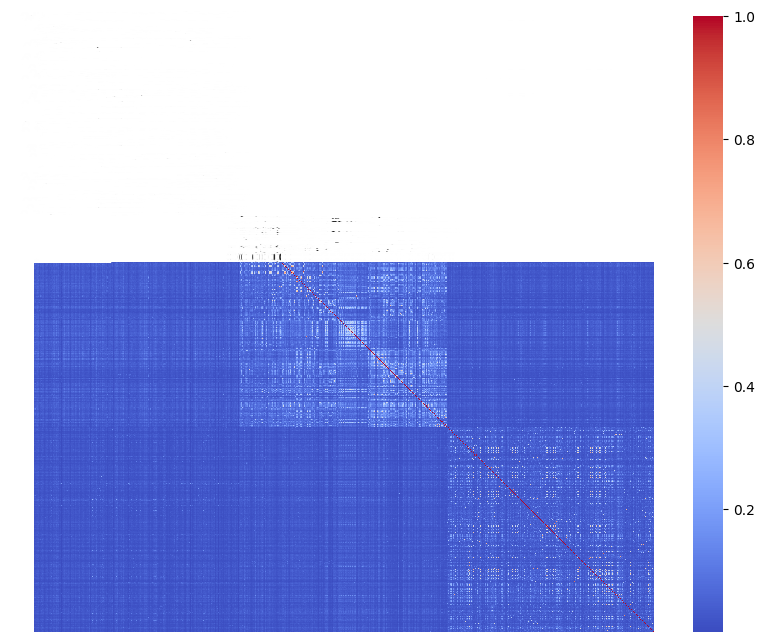

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan heatmap untuk memvisualisasikan hasil cosine similarity sebagai grafik
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity')
plt.show()

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
# Membuat graph menggunakan networkx
G = nx.Graph()

# Menambahkan node-node ke dalam graph
num_nodes = similarity_matrix.shape[0]
for i in range(num_nodes):
    G.add_node(i)

# Menambahkan edge-edge ke dalam graph dengan similarity score sebagai bobotnya
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        similarity_score = similarity_matrix[i][j]
        if similarity_score > 0.2:  # Memastikan bahwa similarity score yang tidak nol ditambahkan sebagai edge
            G.add_edge(i, j, weight=similarity_score)

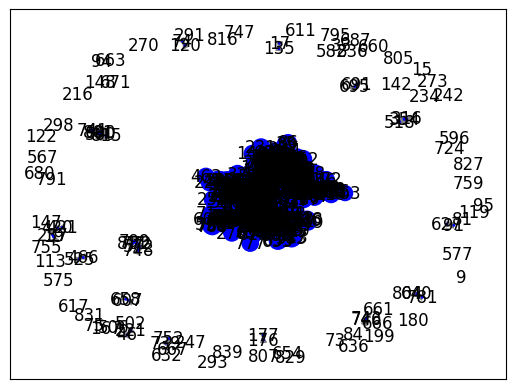

In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 473: 0.2881
Node 460: 0.2738
Node 550: 0.2717
Node 790: 0.2689
Node 477: 0.2645
Node 512: 0.2623
Node 435: 0.2598
Node 494: 0.2597
Node 475: 0.2588
Node 422: 0.2582
Node 467: 0.2580
Node 505: 0.2574
Node 457: 0.2563
Node 470: 0.2554
Node 476: 0.2551
Node 468: 0.2550
Node 543: 0.2550
Node 522: 0.2545
Node 431: 0.2544
Node 507: 0.2544
Node 371: 0.2541
Node 356: 0.2540
Node 461: 0.2540
Node 545: 0.2538
Node 300: 0.2535
Node 416: 0.2535
Node 557: 0.2533
Node 374: 0.2531
Node 451: 0.2529
Node 547: 0.2529
Node 471: 0.2528
Node 465: 0.2527
Node 472: 0.2526
Node 361: 0.2525
Node 542: 0.2525
Node 426: 0.2524
Node 415: 0.2522
Node 537: 0.2519
Node 539: 0.2518
Node 453: 0.2514
Node 380: 0.2513
Node 429: 0.2513
Node 501: 0.2513
Node 355: 0.2510
Node 458: 0.2510
Node 357: 0.2509
Node 370: 0.2508
Node 373: 0.2505
Node 375: 0.2500
Node 490: 0.2497
Node 546: 0.2496
Node 684: 0.2495
Node 541: 0.2494
Node 792: 0.2491
Node 513: 0.2490
Node 362: 0.2489
Node 419: 0.2473
Node 634:

In [ ]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,473,0.288131,[Suara.com - Atlet bulu tangkis tunggal putri ...
1,460,0.273791,[Suara.com - Menteri Pemuda dan Olahraga (Menp...
2,550,0.271728,[Suara.com - Pembalap Lewis Hamilton mengataka...
